In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy.stats import yeojohnson_normplot

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import plotly.express as px

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement:

### Data Gathring

In [2]:
df = pd.read_csv("E:\Data set\healthcare-dataset-stroke-data.csv")
df

id  gender   age  hypertension  heart_disease ever_married   
0      9046    Male  67.0             0              1          Yes  \
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status   
0           Private          Urban             228.69  36.6  formerly smoked  \
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [3]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### 3. Exploratory Data Analysis:

In [4]:
df.shape

(5110, 12)

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()  #Statistics

id          age  hypertension  heart_disease   
count   5110.000000  5110.000000   5110.000000    5110.000000  \
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [10]:
object_columns = df.select_dtypes(include =object).columns
numerical_columns = df.select_dtypes(exclude= object).columns

print(f'we have {len(object_columns)} object features such as {object_columns}')
print("-"*80)
print(f'we have {len(numerical_columns)} numerical features such as {numerical_columns}')

we have 5 object features such as Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
--------------------------------------------------------------------------------
we have 7 numerical features such as Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')


* Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable.

In [ ]:
plt.title('Target Column(stroke)')  #target column
sns.countplot(x = df['stroke'])
plt.show()

* The Target Column is highly imbalance with lot of class 0 values

### Categorical Columns

In [ ]:
plt.title('Gender')
sns.countplot(x = df['gender'])
plt.show()

* There are more female than male patients, and a very small number of patients identify as Other

In [ ]:
plt.title('Hyperrension')
sns.countplot(x = df['hypertension'])
plt.show()

* The majority of patients do not have hypertension.

In [ ]:
plt.title('heart_disease')
sns.countplot(x = df['heart_disease'])
plt.show()

* The majority of patients do not have heart disease.

In [ ]:
plt.title('ever_married')
sns.countplot(x = df['ever_married'])
plt.show()

* The majority of patients are married

In [ ]:
plt.title('work_type')
sns.countplot(x = df['work_type'])
plt.show()

* Most of the patients are in the Private work category. There are also significant numbers in Self-employed and children. The categories Govt_job and Never_worked have fewer patients.

In [ ]:
plt.title('Residence_type')
sns.countplot(x = df['Residence_type'])
plt.show()

* The number of patients living in urban and rural areas is almost equal.* 

In [ ]:
plt.title('smoking_status')
sns.countplot(x = df['smoking_status'])
plt.show()

* Most of the patients have never smoked. The categories formerly smoked and smokes have fewer patients. There's a significant portion of patients with Unknown smoking status

* _________________________________________________

### Continous Columns

In [ ]:
plt.title('age')
sns.histplot(df['age'],kde = True)
plt.show()

plt.title('age')
sns.boxplot(df['age'])
plt.show()

* The age of the patients varies from young to old, with the majority of patients being in the range of 40-80 years

In [ ]:
plt.title('avg_glucose_level')
sns.histplot(df['avg_glucose_level'],kde = True)
plt.show()

plt.title('avg_glucose_level')
sns.boxplot(df['avg_glucose_level'])
plt.show()

* Most patients have an average glucose level in the range of 50-120
There are Some Outliers in avg_glucose_level Column

In [ ]:
plt.title('bmi')
sns.histplot(df['bmi'],kde = True)
plt.show()

plt.title('bmi')
sns.boxplot(df['bmi'])
plt.show()

* The majority of patients have a BMI in the range of 20-40, which is considered normal to overweight.
* There are some extremely high outliers in BMI column.

==============================================

### 2 Bivariate Analysis

* Bivariate analysis is the simultaneous analysis of two variables. It explores the concept of the relationship between two variable whether there exists an association and the strength of this association or whether there are differences between two variables and the significance of these differences

#### Categorical Columns

In [ ]:
plt.title('Gender')
sns.countplot(x = df['gender'],hue = df['stroke'])
plt.show()

* Both males and females have a similar proportion of stroke cases and the Other category has no stroke cases.

In [ ]:
plt.title('Hypertension')
sns.countplot(x = df['hypertension'],hue = df['stroke'])
plt.show()

* Patients with hypertension have a higher proportion of stroke cases than those without hypertension

In [ ]:
plt.title('heart_disease')
sns.countplot(x = df['heart_disease'],hue = df['stroke'])
plt.show()

* Patients with heart disease also have a higher proportion of stroke cases than those without heart disease.

In [ ]:
plt.title('ever_married')
sns.countplot(x = df['ever_married'],hue = df['stroke'])
plt.show()

* Those who have been married have a higher proportion of stroke cases than those who have not.

In [ ]:
plt.title('work_type')
sns.countplot(x = df['work_type'],hue = df['stroke'])
plt.show()

* Patients who work in private jobs have a higher proportion of stroke cases compared to other work types

In [ ]:
plt.title('Residence_type')
sns.countplot(x = df['Residence_type'],hue = df['stroke'])
plt.show()

* The proportion of stroke cases is almost equal for both urban and rural residents.

In [ ]:
plt.title('smoking_status')
sns.countplot(x = df['smoking_status'],hue = df['stroke'])
plt.show()

* The proportion of stroke cases is higher for patients who formerly smoked or currently smoke compared to those who never smoked. The stroke proportion for the 'Unknown' category is lower.

----------------------------------------------------------

#### Continous Columns

In [ ]:
sns.catplot(x = df['stroke'], y = df['age'])
plt.title('Age')
plt.show()

* Stroke cases are more in older patients

In [ ]:
sns.catplot(x = df['stroke'], y = df['avg_glucose_level'])
plt.title('avg_glucose_level')
plt.show()

* Stroke Cases are more in low avg_glucose_level patients

In [ ]:
sns.catplot(x = df['stroke'], y = df['bmi'])
plt.title('BMI')
plt.show()

* The BMI distributions for stroke and non-stroke patients are quite similar.
* BMI is not be a strong predictor for stroke

======================================================

### 3 Multivariate Analysis

* It is an extension of bivariate analysis which means it involves multiple variables at the same time to find correlation between them. Multivariate Analysis is a set of statistical model that examine patterns in multidimensional data by considering at once, several data variable.

Text(0.5, 1.0, 'Age vs Work Type')

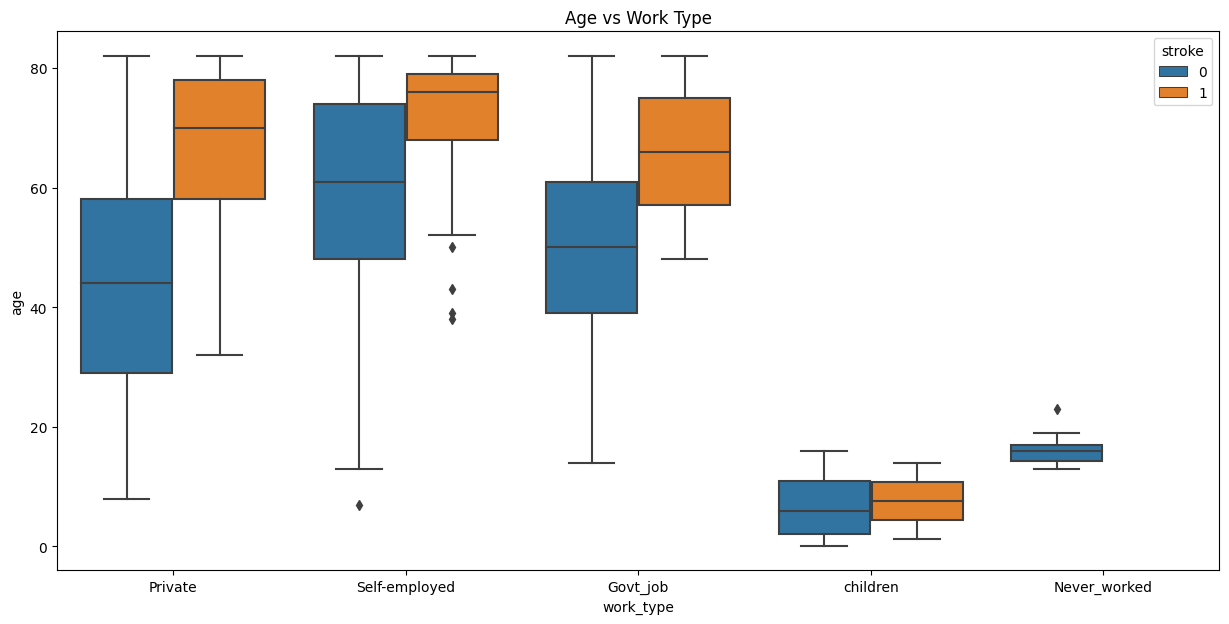

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['work_type'], y=df['age'], hue=df['stroke'])
plt.title('Age vs Work Type')

* Older people, particularly those who are self-employed or in private jobs, seem to have a higher incidence of stroke
* For children, stroke cases are very rare

Text(0.5, 1.0, 'Average Glucose Level vs Smoking Status')

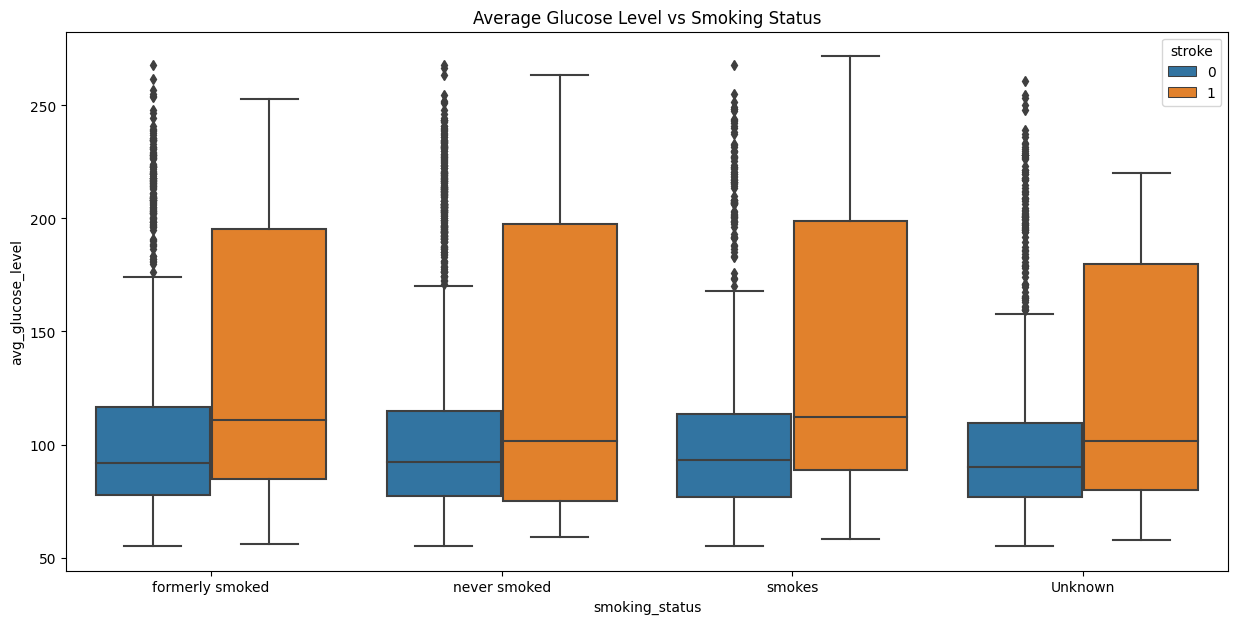

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['smoking_status'], y=df['avg_glucose_level'], hue=df['stroke'])
plt.title('Average Glucose Level vs Smoking Status')

* The median glucose level for stroke patients is higher across all smoking status categories. Patients who formerly smoked or who currently smoke have a wider distribution of glucose levels, indicating more variability in these categories

Text(0.5, 1.0, 'BMI vs Gender')

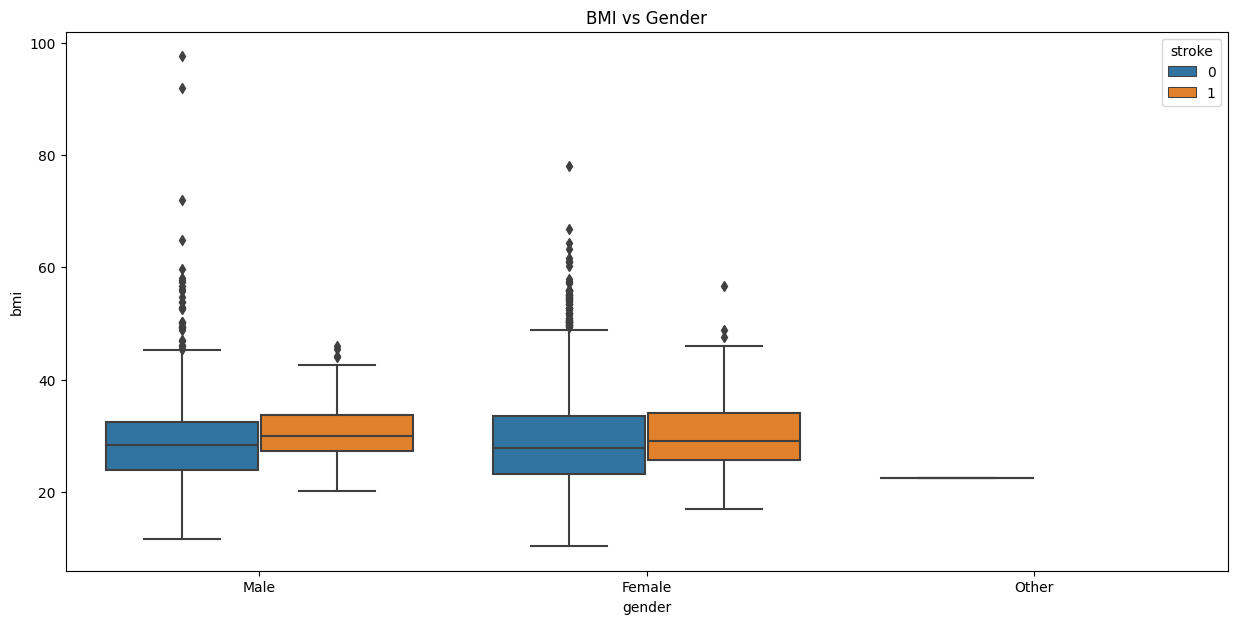

In [15]:
plt.figure(figsize=(15,7)) 
sns.boxplot(x=df['gender'], y=df['bmi'], hue=df['stroke'])
plt.title('BMI vs Gender')

* The BMI distributions for males and females are quite similar. The incidence of stroke doesn't seem to vary significantly with BMI within each gender. However, there are a few females with extremely high BMI who have experienced a stroke

 ===================================================

### 4. Feature Engineering

* Updating the values of features

#### Handling Missing Values

In [16]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
np.around(df['bmi'].median())

28.0

In [18]:
df['bmi'].fillna(np.around(df['bmi'].median()),inplace = True)

#### Encoding

* better encoding leads to a better model and most algorithms cannot handle the categorical variables unless they are converted into a numerical value.
*  transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [19]:
df.drop('id',axis =1,inplace = True)

In [20]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [22]:
df['gender'].replace({'Male':1, 'Female':0, 'Other':2},inplace =True)

In [23]:
gender_data = {'Male':1, 'Female':0, 'Other':2}

In [24]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [25]:
df['ever_married'].replace({'Yes':1,'No':0},inplace =True)

In [26]:
ever_married_data = {'Yes':1,'No':0}

In [27]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [28]:
df['Residence_type'].replace({'Urban':1, 'Rural':0},inplace = True)

In [29]:
Residence_type_data = {'Urban':1, 'Rural':0}

#### One Hot Encoding

* One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

* work_type
* smoking_status


In [30]:
df = pd.get_dummies(df,columns = ['work_type','smoking_status'],dtype=int)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   int32  
 10  work_type_Never_worked          5110 non-null   int32  
 11  work_type_Private               5110 non-null   int32  
 12  work_type_Self-employed         51

In [32]:
df

gender   age  hypertension  heart_disease  ever_married  Residence_type   
0          1  67.0             0              1             1               1  \
1          0  61.0             0              0             1               0   
2          1  80.0             0              1             1               0   
3          0  49.0             0              0             1               1   
4          0  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5105       0  80.0             1              0             1               1   
5106       0  81.0             0              0             1               1   
5107       0  35.0             0              0             1               0   
5108       1  51.0             0              0             1               0   
5109       0  44.0             0              0             1               1   

      avg_glucose_level   bmi  stroke  work_type_Govt_job   
0                228.69  36.6       1                   0  \
1                202.21  28.0       1                   0   
2                105.92  32.5       1                   0   
3                171.23  34.4       1                   0   
4                174.12  24.0       1                   0   
...                 ...   ...     ...                 ...   
5105              83.75  28.0       0                   0   
5106             125.20  40.0       0                   0   
5107              82.99  30.6       0                   0   
5108             166.29  25.6       0                   0   
5109              85.28  26.2       0                   1   

      work_type_Never_worked  work_type_Private  work_type_Self-employed   
0                          0                  1                        0  \
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
5105                       0                  1                        0   
5106                       0                  0                        1   
5107                       0                  0                        1   
5108                       0                  1                        0   
5109                       0                  0                        0   

      work_type_children  smoking_status_Unknown   
0                      0                       0  \
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
5105                   0                       0   
5106                   0                       0   
5107                   0                       0   
5108                   0                       0   
5109                   0                       1   

      smoking_status_formerly smoked  smoking_status_never smoked   
0                                  1                            0  \
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
510

#### Outliers

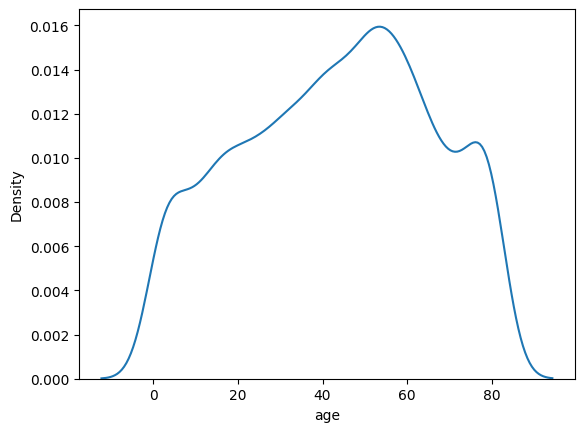

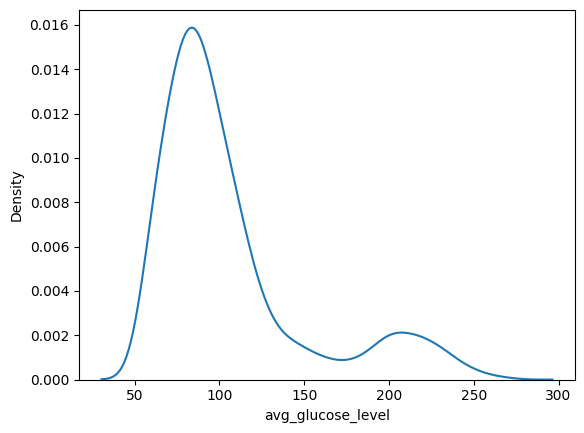

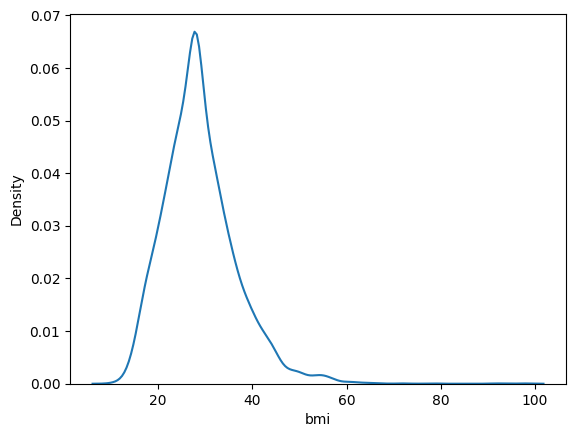

In [33]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    sns.kdeplot(df[column])
    plt.show()

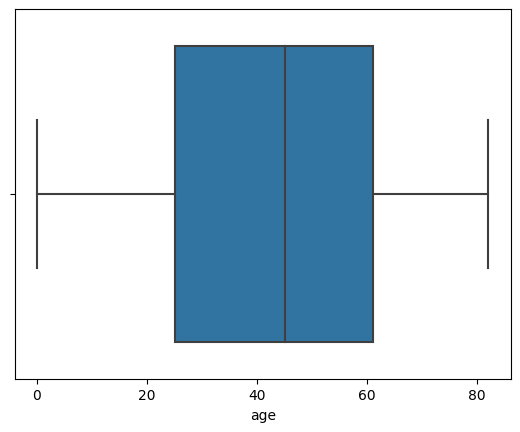

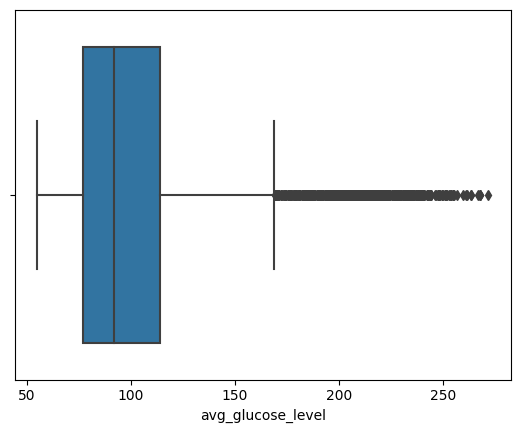

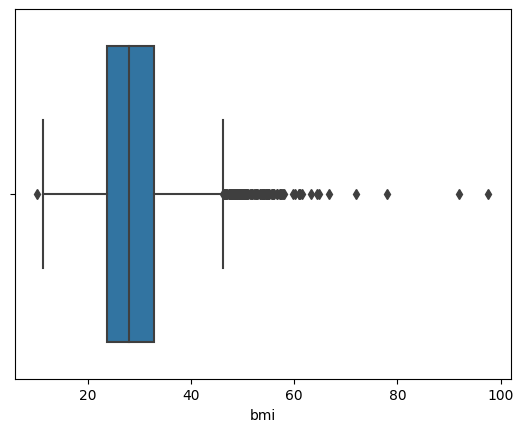

In [34]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    sns.boxplot(x =df[column])
    plt.show()

In [35]:
for column in ['age', 'avg_glucose_level', 'bmi']:
    print(column)
    
    q1 = np.quantile(df[column],0.25)
    q2 = np.quantile(df[column],0.50)
    q3 = np.quantile(df[column],0.75)

    print("Q1 :",q1)
    print("Q2 :",q2)
    print("Q3 :",q3)

    iqr = q3-q1
    print("IQR is :",iqr)

    upper_tail = q3 + 1.5 * iqr
    print("Upper Tail :", upper_tail)

    lower_tail = q1 -1.5*iqr
    print("Lower Tail :", lower_tail)
    
    outliers = []
    for Xi in df[column]:
        if Xi > upper_tail:
            outliers.append(Xi)
    print('Outliers : ',len(outliers))
    
    print('-'*50)

age
Q1 : 25.0
Q2 : 45.0
Q3 : 61.0
IQR is : 36.0
Upper Tail : 115.0
Lower Tail : -29.0
Outliers :  0
--------------------------------------------------
avg_glucose_level
Q1 : 77.245
Q2 : 91.88499999999999
Q3 : 114.09
IQR is : 36.845
Upper Tail : 169.35750000000002
Lower Tail : 21.977500000000006
Outliers :  627
--------------------------------------------------
bmi
Q1 : 23.8
Q2 : 28.0
Q3 : 32.8
IQR is : 8.999999999999996
Upper Tail : 46.29999999999999
Lower Tail : 10.300000000000006
Outliers :  125
--------------------------------------------------


#### Imputation

* Data imputation is a method for retaining the majority of the dataset's data and information by substituting missing data with a different value. 

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

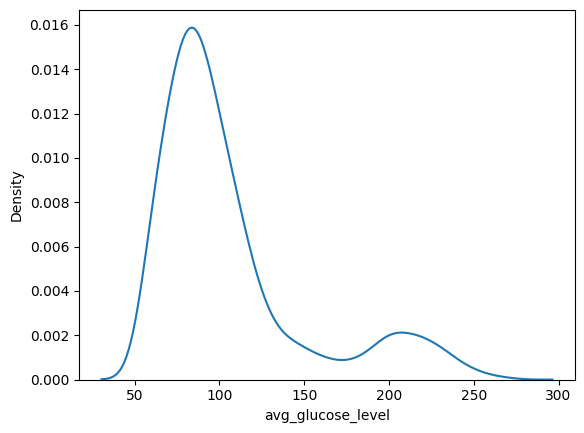

In [36]:
sns.kdeplot(df['avg_glucose_level'])

<Axes: >

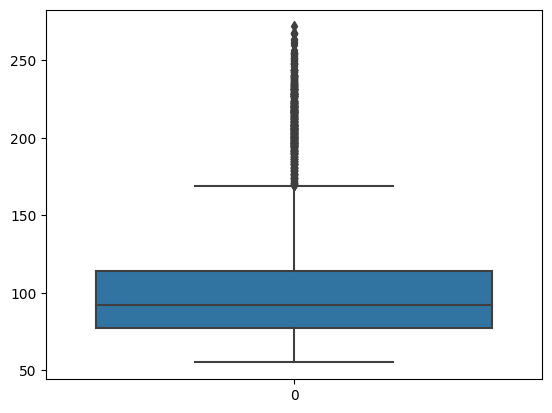

In [37]:
sns.boxplot(df['avg_glucose_level'], whis = 1.5)

In [38]:
q1 = np.quantile(df['avg_glucose_level'],0.25)
q2 = np.quantile(df['avg_glucose_level'],0.50)
q3 = np.quantile(df['avg_glucose_level'],0.75)

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)

iqr = q3-q1
print("IQR is :",iqr)

upper_tail = q3 + 1.5 * iqr
print("Upper Tail :", upper_tail)

lower_tail = q1 -1.5*iqr
print("Lower Tail :", lower_tail)

outliers = []
for Xi in df['avg_glucose_level']:
    if Xi > upper_tail or Xi < lower_tail:
        outliers.append(Xi)
print('Outliers : ',len(outliers))

Q1 : 77.245
Q2 : 91.88499999999999
Q3 : 114.09
IQR is : 36.845
Upper Tail : 169.35750000000002
Lower Tail : 21.977500000000006
Outliers :  627


In [39]:
upper_tail

169.35750000000002

In [40]:
df.loc[df['avg_glucose_level']>upper_tail,'avg_glucose_level']

0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5061    223.78
5062    211.58
5063    179.38
5064    193.88
5076    174.37
Name: avg_glucose_level, Length: 627, dtype: float64

In [41]:
df.loc[df['avg_glucose_level']>upper_tail,'avg_glucose_level'] = upper_tail

<Axes: >

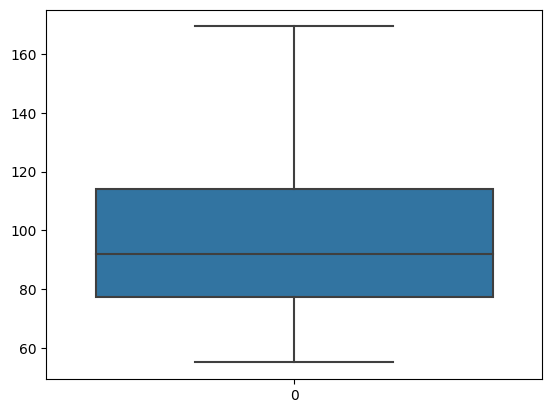

In [42]:
sns.boxplot(df['avg_glucose_level'], whis = 1.5)

In [43]:
outliers = []
for Xi in df['avg_glucose_level']:
    if Xi > upper_tail or Xi < lower_tail:
        outliers.append(Xi)
len(outliers)

0

<Axes: xlabel='bmi', ylabel='Density'>

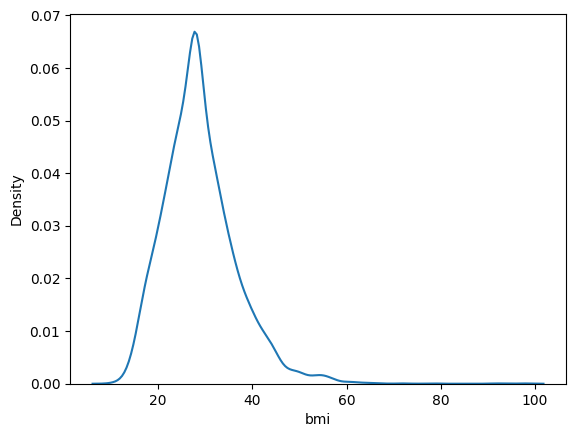

In [44]:
sns.kdeplot(df['bmi'])

<Axes: >

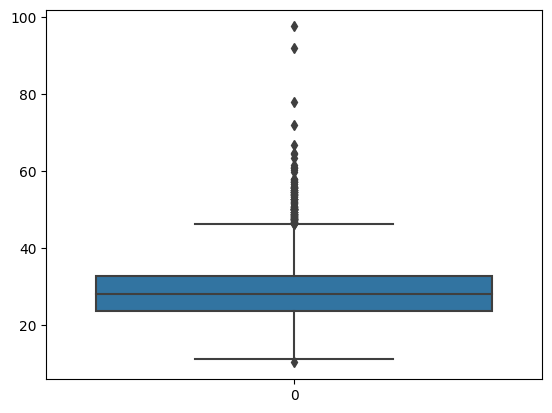

In [45]:
sns.boxplot(df['bmi'], whis = 1.5)

In [46]:
q1 = np.quantile(df['bmi'],0.25)
q2 = np.quantile(df['bmi'],0.50)
q3 = np.quantile(df['bmi'],0.75)

print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)

iqr = q3-q1
print("IQR is :",iqr)

upper_tail = q3 + 1.5 * iqr
print("Upper Tail :", upper_tail)

lower_tail = q1 -1.5*iqr
print("Lower Tail :", lower_tail)

outliers = []
for Xi in df['bmi']:
    if Xi > upper_tail or Xi < lower_tail:
        outliers.append(Xi)
print('Outliers : ',len(outliers))

Q1 : 23.8
Q2 : 28.0
Q3 : 32.8
IQR is : 8.999999999999996
Upper Tail : 46.29999999999999
Lower Tail : 10.300000000000006
Outliers :  126


In [47]:
df.loc[df['bmi']>upper_tail,'bmi'] = upper_tail
df.loc[df['bmi']<lower_tail,'bmi'] = lower_tail

<Axes: >

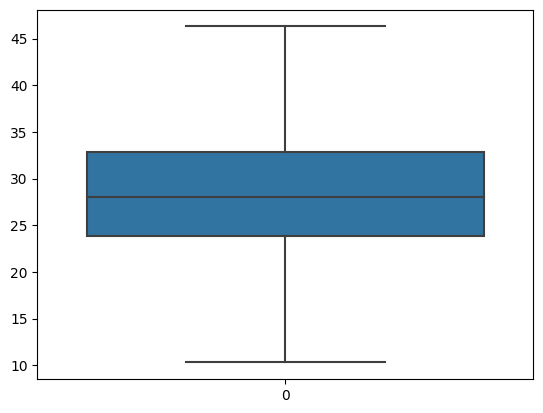

In [48]:
sns.boxplot(df['bmi'],whis = 1.5)

In [49]:
outliers = []
for Xi in df['bmi']:
    if Xi > upper_tail or Xi < lower_tail:
        outliers.append(Xi)
len(outliers)

0

======================================================

### Sampling

In [50]:
df

gender   age  hypertension  heart_disease  ever_married  Residence_type   
0          1  67.0             0              1             1               1  \
1          0  61.0             0              0             1               0   
2          1  80.0             0              1             1               0   
3          0  49.0             0              0             1               1   
4          0  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5105       0  80.0             1              0             1               1   
5106       0  81.0             0              0             1               1   
5107       0  35.0             0              0             1               0   
5108       1  51.0             0              0             1               0   
5109       0  44.0             0              0             1               1   

      avg_glucose_level   bmi  stroke  work_type_Govt_job   
0              169.3575  36.6       1                   0  \
1              169.3575  28.0       1                   0   
2              105.9200  32.5       1                   0   
3              169.3575  34.4       1                   0   
4              169.3575  24.0       1                   0   
...                 ...   ...     ...                 ...   
5105            83.7500  28.0       0                   0   
5106           125.2000  40.0       0                   0   
5107            82.9900  30.6       0                   0   
5108           166.2900  25.6       0                   0   
5109            85.2800  26.2       0                   1   

      work_type_Never_worked  work_type_Private  work_type_Self-employed   
0                          0                  1                        0  \
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
5105                       0                  1                        0   
5106                       0                  0                        1   
5107                       0                  0                        1   
5108                       0                  1                        0   
5109                       0                  0                        0   

      work_type_children  smoking_status_Unknown   
0                      0                       0  \
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
5105                   0                       0   
5106                   0                       0   
5107                   0                       0   
5108                   0                       0   
5109                   0                       1   

      smoking_status_formerly smoked  smoking_status_never smoked   
0                                  1                            0  \
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
510

### SMOTE

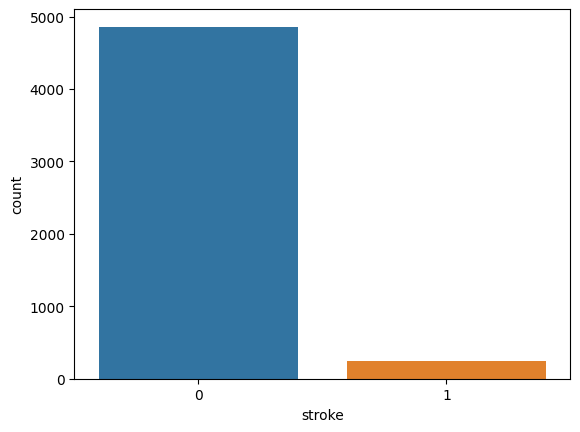

In [51]:
sns.countplot(x = df['stroke'])
plt.show()

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [54]:
x = df.drop('stroke',axis = 1)
y = df['stroke']

smote = SMOTE(sampling_strategy = 0.8)
x_sampled, y_sampled = smote.fit_resample(x,y)

In [55]:
y_sampled.value_counts()

stroke
0    4861
1    3888
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

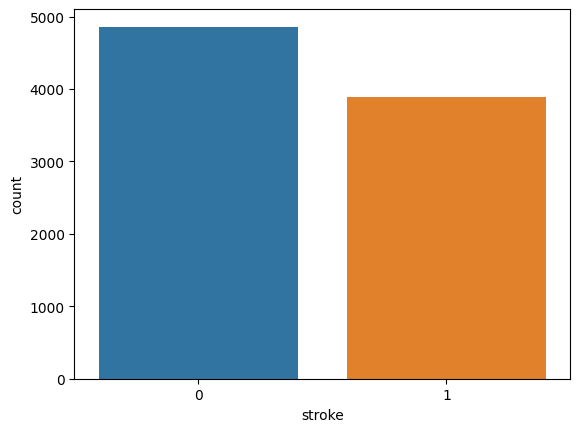

In [56]:
sns.countplot(x = y_sampled)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Govt_job              5110 non-null   int32  
 10  work_type_Never_worked          5110 non-null   int32  
 11  work_type_Private               5110 non-null   int32  
 12  work_type_Self-employed         51

### Correlation Heatmap

* Here we are using a heat map to check the correlation between all the columns in the dataset. It is a data visualisation technique that shows the magnitude of the phenomenon as colour in two dimensions. The values of correlation can vary from -1 to 1 where -1 means strong negative and +1 means strong positive correlation

<Axes: >

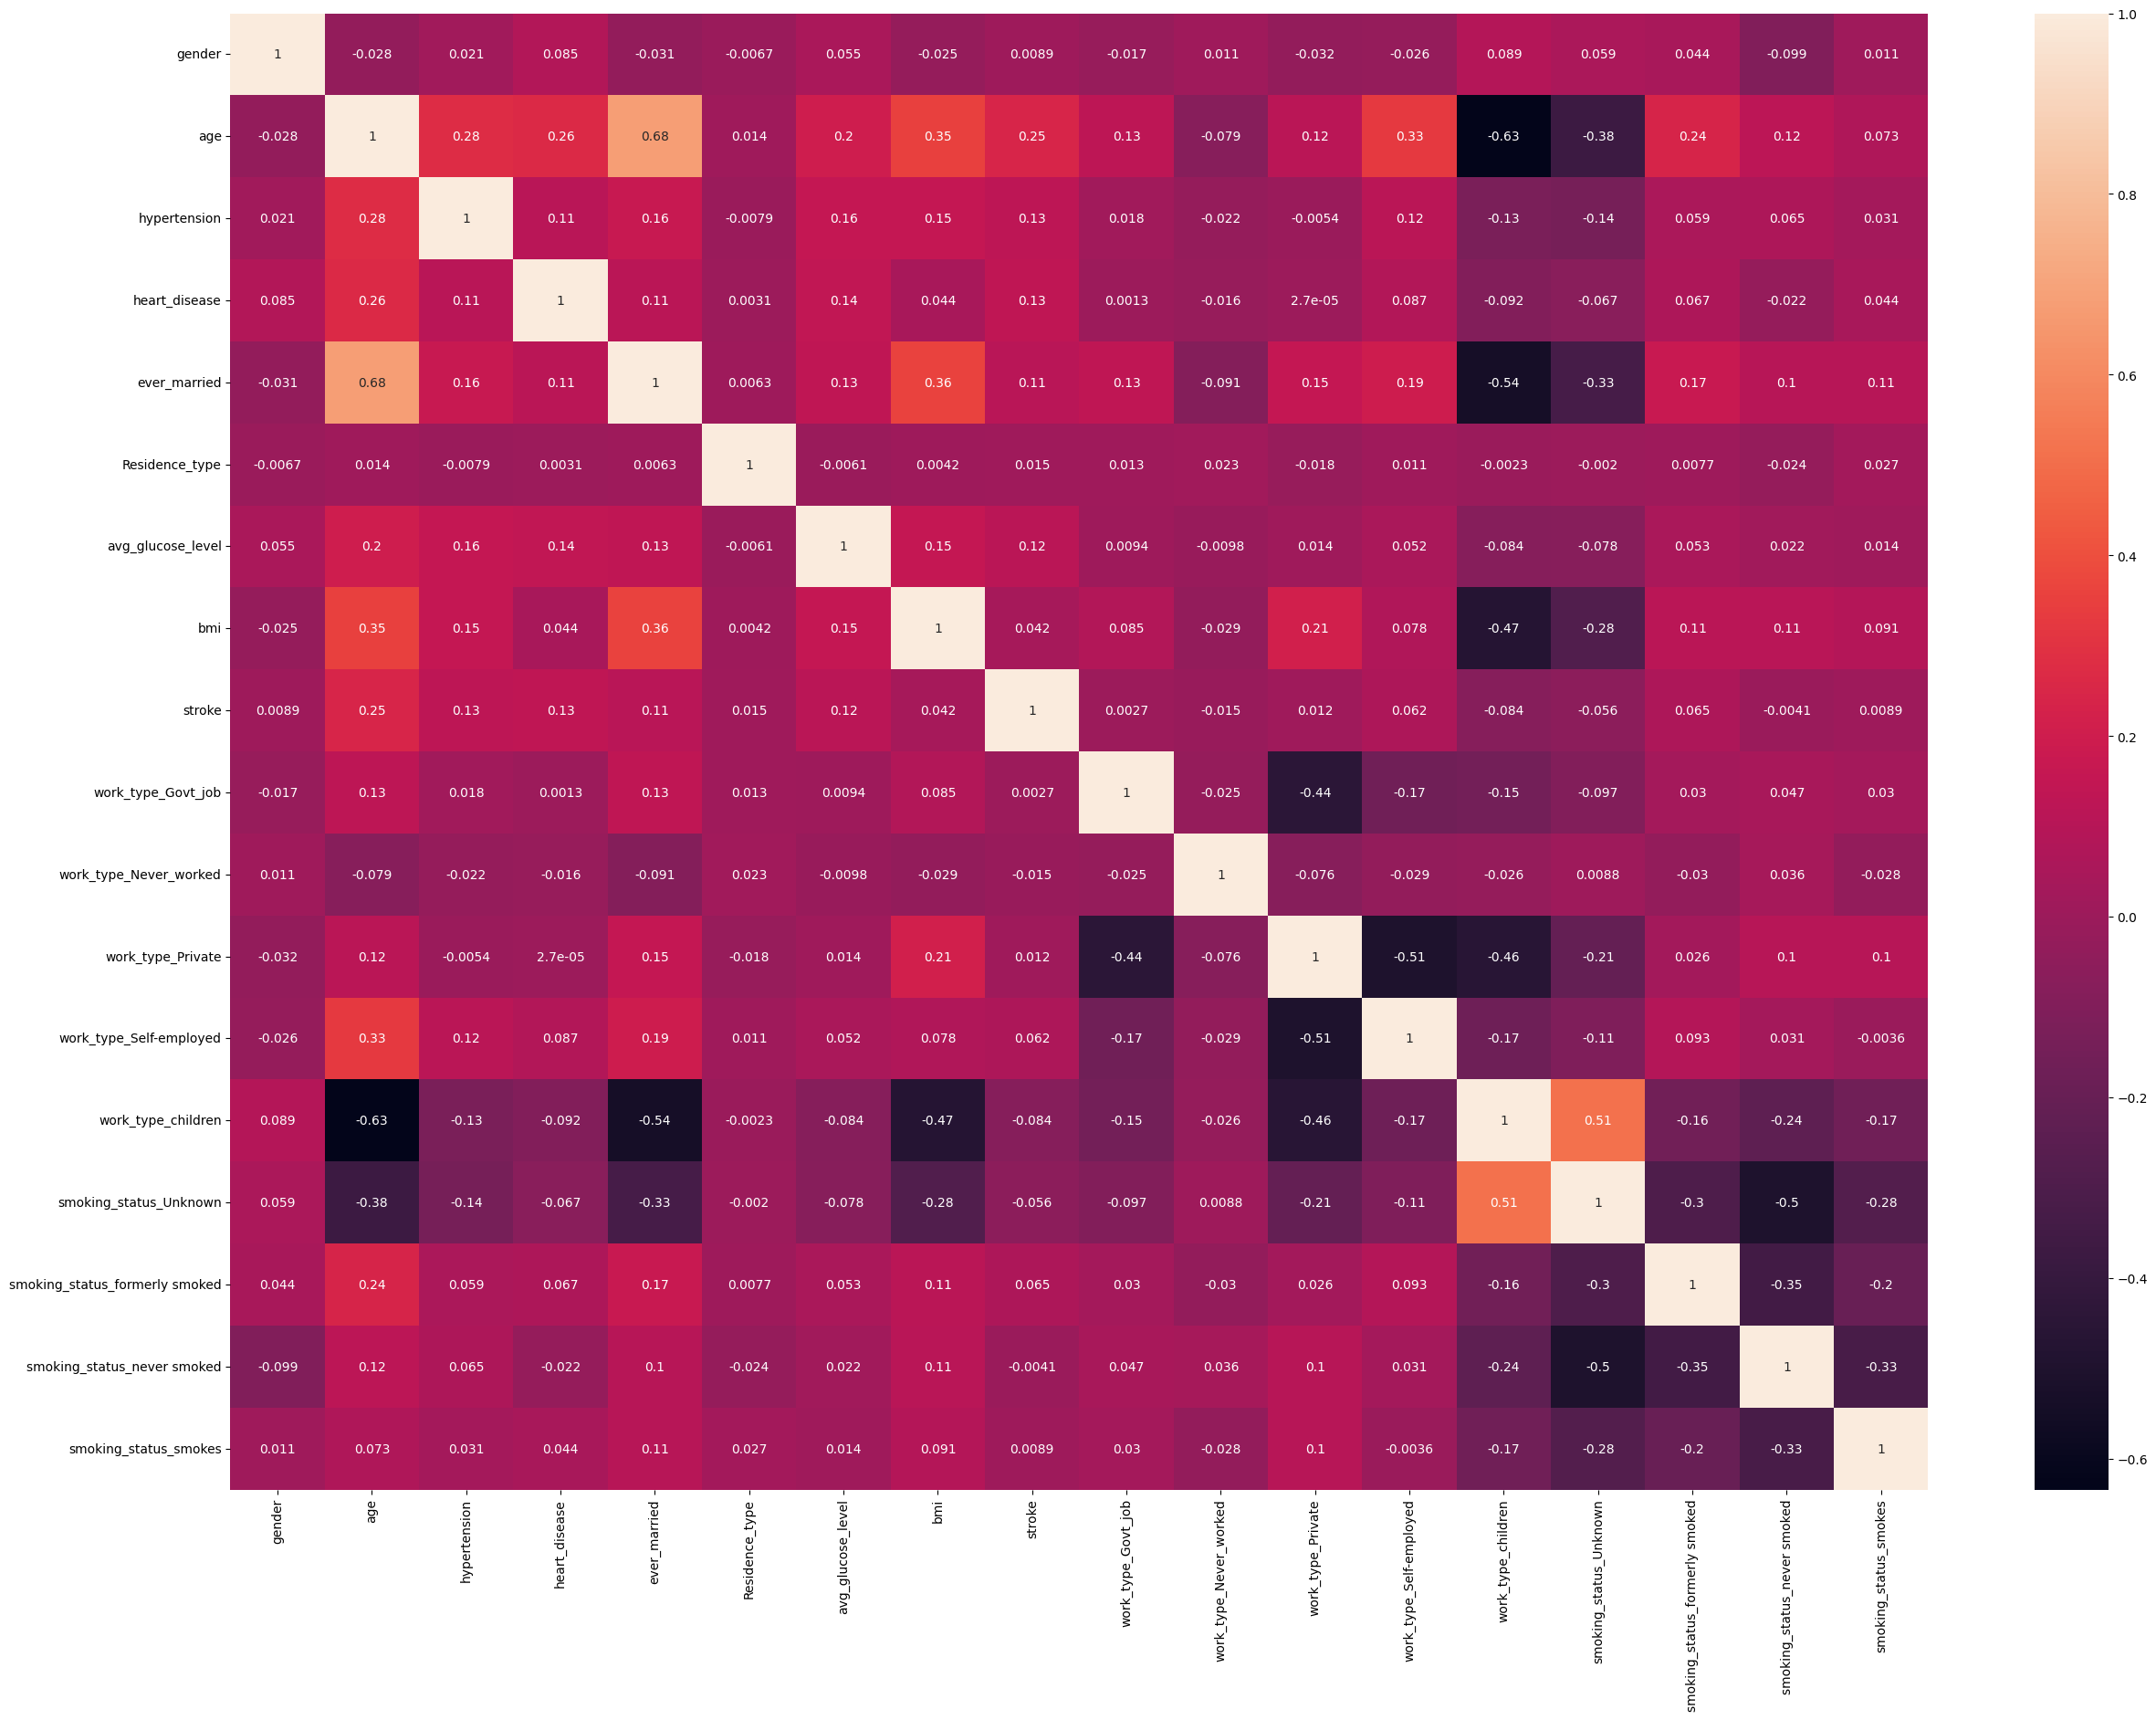

In [58]:
plt.figure(figsize=(30,21))
sns.heatmap(df.corr(), annot= True)

#### Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x = x_sampled
y = y_sampled

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6999, 17), (1750, 17), (6999,), (1750,))

### Logistic regression Model

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train,y_train)

LogisticRegression()

In [67]:
pred = logistic_clf.predict(x_test)[50:60]
pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [68]:
y_test[50:60]

1010    0
4550    0
7771    1
4457    0
7161    1
754     0
6625    1
5579    1
4888    0
1132    0
Name: stroke, dtype: int64

### Evaluation Matrics

In [69]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score, roc_curve

#### test

In [70]:
y_pred_test = logistic_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[917  27]
 [ 93 713]]
--------------------------------------------------
Accuracy :
 0.9314285714285714
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       944
           1       0.96      0.88      0.92       806

    accuracy                           0.93      1750
   macro avg       0.94      0.93      0.93      1750
weighted avg       0.93      0.93      0.93      1750



#### train

In [71]:
y_pred_train = logistic_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3775  142]
 [ 384 2698]]
--------------------------------------------------
Accuracy :
 0.9248464066295184
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      3917
           1       0.95      0.88      0.91      3082

    accuracy                           0.92      6999
   macro avg       0.93      0.92      0.92      6999
weighted avg       0.93      0.92      0.92      6999



* Logistic Regression model has 91% of testing accuracy and 91% of training accuracy

In [72]:
x = x_sampled
y = y_sampled

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6999, 17), (1750, 17), (6999,), (1750,))

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

#### test

In [74]:
y_pred_test = dt_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[953   8]
 [  7 782]]
--------------------------------------------------
Accuracy :
 0.9914285714285714
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       961
           1       0.99      0.99      0.99       789

    accuracy                           0.99      1750
   macro avg       0.99      0.99      0.99      1750
weighted avg       0.99      0.99      0.99      1750



#### train

In [75]:
y_pred_train = dt_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3851   49]
 [  36 3063]]
--------------------------------------------------
Accuracy :
 0.9878554079154165
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3900
           1       0.98      0.99      0.99      3099

    accuracy                           0.99      6999
   macro avg       0.99      0.99      0.99      6999
weighted avg       0.99      0.99      0.99      6999



In [76]:
dt_clf.feature_importances_

array([0.01208343, 0.42803292, 0.00539095, 0.00688007, 0.01268442,
       0.01367703, 0.07581665, 0.08653388, 0.03828044, 0.        ,
       0.03396221, 0.0343766 , 0.        , 0.05320582, 0.05561764,
       0.05793254, 0.08552541])

In [77]:
s1 = pd.Series(dt_clf.feature_importances_, index=x.columns)
s1

gender                            0.012083
age                               0.428033
hypertension                      0.005391
heart_disease                     0.006880
ever_married                      0.012684
Residence_type                    0.013677
avg_glucose_level                 0.075817
bmi                               0.086534
work_type_Govt_job                0.038280
work_type_Never_worked            0.000000
work_type_Private                 0.033962
work_type_Self-employed           0.034377
work_type_children                0.000000
smoking_status_Unknown            0.053206
smoking_status_formerly smoked    0.055618
smoking_status_never smoked       0.057933
smoking_status_smokes             0.085525
dtype: float64

<Axes: >

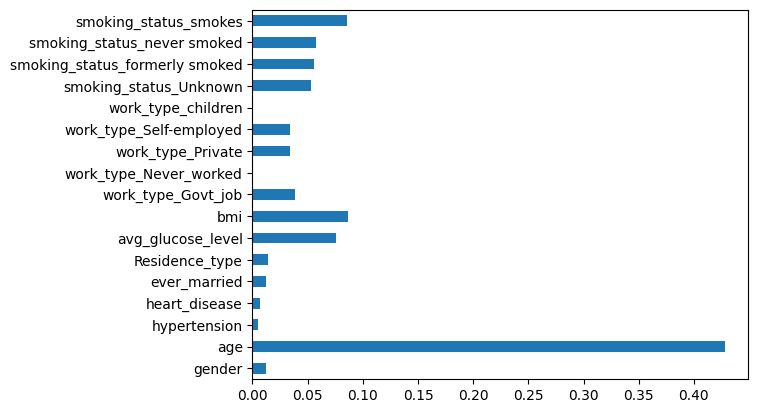

In [78]:
s1 = pd.Series(dt_clf.feature_importances_, index=x.columns)
s1.plot(kind = 'barh')

### Hyperparameter Tuning

* A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters. 
However, there is another kind of parameter, known as Hyperparameters,

In [79]:
x = x_sampled
y = y_sampled

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6999, 17), (1750, 17), (6999,), (1750,))

In [89]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : np.arange(3,10),
            "min_samples_split" : np.arange(5,20),
            "min_samples_leaf" : np.arange(2,10)}

ht_dt_clf = DecisionTreeClassifier(random_state=10)

ht_dt_clf = GridSearchCV(dt_clf, hyp_grid, scoring=None,cv = 4, n_jobs=-1) # cv >> 3 to 10
ht_dt_clf.fit(x_train, y_train)
ht_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=6)

#### test

In [90]:
ht_dt_clf = ht_dt_clf.best_estimator_
y_pred_test = ht_dt_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[865  79]
 [ 70 736]]
--------------------------------------------------
Accuracy :
 0.9148571428571428
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       944
           1       0.90      0.91      0.91       806

    accuracy                           0.91      1750
   macro avg       0.91      0.91      0.91      1750
weighted avg       0.91      0.91      0.91      1750



#### train

In [91]:
y_pred_train = ht_dt_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3655  262]
 [ 186 2896]]
--------------------------------------------------
Accuracy :
 0.9359908558365481
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      3917
           1       0.92      0.94      0.93      3082

    accuracy                           0.94      6999
   macro avg       0.93      0.94      0.94      6999
weighted avg       0.94      0.94      0.94      6999



* By Using Hyperparameter Tuning The Model Testing accuracy is 92% and Training accuracy is 94%

### Pruning

In [92]:
x = x_sampled
y = y_sampled

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6999, 17), (1750, 17), (6999,), (1750,))

In [94]:
p_dt_clf = DecisionTreeClassifier(random_state=10,ccp_alpha=None)

path = p_dt_clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, _ = path.ccp_alphas, path.impurities

In [95]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alphas:
    print("CCP Alpha :", ccp_alpha)
    
    p_dt_clf = DecisionTreeClassifier( ccp_alpha=ccp_alpha)
    p_dt_clf.fit(x_train, y_train)
    
    train_accuracy_list.append(p_dt_clf.score(x_train, y_train))
    test_accuracy_list.append(p_dt_clf.score(x_test, y_test))
    
    print("Training Accuracy ==",p_dt_clf.score(x_train, y_train))
    print("Testing  Accuracy ==",p_dt_clf.score(x_test, y_test))
    print("*"*30)
    

CCP Alpha : 0.0
Training Accuracy == 1.0
Testing  Accuracy == 0.9365714285714286
******************************
CCP Alpha : 8.466818011038613e-05
Training Accuracy == 1.0
Testing  Accuracy == 0.9371428571428572
******************************
CCP Alpha : 8.890158911590547e-05
Training Accuracy == 0.9994284897842549
Testing  Accuracy == 0.9394285714285714
******************************
CCP Alpha : 8.890158911590547e-05
Training Accuracy == 0.9997142448921275
Testing  Accuracy == 0.9377142857142857
******************************
CCP Alpha : 9.376339477068153e-05
Training Accuracy == 0.9994284897842549
Testing  Accuracy == 0.9365714285714286
******************************
CCP Alpha : 9.516055266952203e-05
Training Accuracy == 0.9991427346763824
Testing  Accuracy == 0.94
******************************
CCP Alpha : 9.52517026241844e-05
Training Accuracy == 0.9989998571224461
Testing  Accuracy == 0.9405714285714286
******************************
CCP Alpha : 9.52517026241844e-05
Training Accura

Training Accuracy == 0.9895699385626519
Testing  Accuracy == 0.9445714285714286
******************************
CCP Alpha : 0.00014287755393627662
Training Accuracy == 0.9898556936705244
Testing  Accuracy == 0.9457142857142857
******************************
CCP Alpha : 0.0001433394425804673
Training Accuracy == 0.9898556936705244
Testing  Accuracy == 0.9422857142857143
******************************
CCP Alpha : 0.0001524027241986951
Training Accuracy == 0.9895699385626519
Testing  Accuracy == 0.9457142857142857
******************************
CCP Alpha : 0.00016328863307003038
Training Accuracy == 0.9892841834547793
Testing  Accuracy == 0.9434285714285714
******************************
CCP Alpha : 0.000165102951215253
Training Accuracy == 0.9888555507929704
Testing  Accuracy == 0.9462857142857143
******************************
CCP Alpha : 0.00016669047959232272
Training Accuracy == 0.9888555507929704
Testing  Accuracy == 0.9457142857142857
******************************
CCP Alpha : 0.000

Training Accuracy == 0.9755679382768967
Testing  Accuracy == 0.9417142857142857
******************************
CCP Alpha : 0.00024225072446246894
Training Accuracy == 0.9755679382768967
Testing  Accuracy == 0.9411428571428572
******************************
CCP Alpha : 0.0002449329496050456
Training Accuracy == 0.9749964280611516
Testing  Accuracy == 0.9417142857142857
******************************
CCP Alpha : 0.00025003571938848407
Training Accuracy == 0.9751393056150879
Testing  Accuracy == 0.9417142857142857
******************************
CCP Alpha : 0.00025003571938848407
Training Accuracy == 0.9748535505072153
Testing  Accuracy == 0.9417142857142857
******************************
CCP Alpha : 0.0002503759040407133
Training Accuracy == 0.9737105300757251
Testing  Accuracy == 0.9417142857142857
******************************
CCP Alpha : 0.000257179597085298
Training Accuracy == 0.9735676525217888
Testing  Accuracy == 0.94
******************************
CCP Alpha : 0.00025717959708529

Training Accuracy == 0.9554222031718816
Testing  Accuracy == 0.9371428571428572
******************************
CCP Alpha : 0.0005254732336279703
Training Accuracy == 0.954564937848264
Testing  Accuracy == 0.9371428571428572
******************************
CCP Alpha : 0.0005278531853756885
Training Accuracy == 0.9538505500785827
Testing  Accuracy == 0.9382857142857143
******************************
CCP Alpha : 0.000539515413068778
Training Accuracy == 0.9537076725246464
Testing  Accuracy == 0.9388571428571428
******************************
CCP Alpha : 0.0005442954435667681
Training Accuracy == 0.9534219174167738
Testing  Accuracy == 0.9394285714285714
******************************
CCP Alpha : 0.0005626777851381367
Training Accuracy == 0.952993284754965
Testing  Accuracy == 0.9388571428571428
******************************
CCP Alpha : 0.0005731425533908841
Training Accuracy == 0.9522788969852836
Testing  Accuracy == 0.9377142857142857
******************************
CCP Alpha : 0.00058589

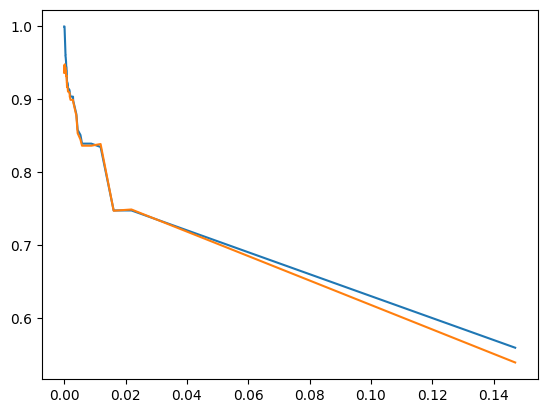

In [96]:
plt.plot(ccp_alphas,train_accuracy_list )
plt.plot(ccp_alphas,test_accuracy_list )

In [97]:
px.line(x = ccp_alphas,y = [test_accuracy_list,train_accuracy_list])

In [98]:
p_dt_clf = DecisionTreeClassifier( ccp_alpha=0.00046569488444643547)
p_dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00046569488444643547)

#### test

In [99]:
y_pred_test = p_dt_clf.predict(x_test)

cnf_mat_test = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix Test data :\n',cnf_mat_test)
print('-'*50)

accuracy_test = accuracy_score(y_test,y_pred_test)
print('Accuracy :\n',accuracy_test)
print('-'*50)

clf_report_test = classification_report(y_test,y_pred_test)
print('Classification Report :\n',clf_report_test)

Confusion Matrix Test data :
 [[903  41]
 [ 69 737]]
--------------------------------------------------
Accuracy :
 0.9371428571428572
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       944
           1       0.95      0.91      0.93       806

    accuracy                           0.94      1750
   macro avg       0.94      0.94      0.94      1750
weighted avg       0.94      0.94      0.94      1750



#### train

In [100]:
y_pred_train = p_dt_clf.predict(x_train)

cnf_mat_train = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix Test data :\n',cnf_mat_train)
print('-'*50)

accuracy_train = accuracy_score(y_train,y_pred_train)
print('Accuracy :\n',accuracy_train)
print('-'*50)

clf_report_train = classification_report(y_train,y_pred_train)
print('Classification Report :\n',clf_report_train)

Confusion Matrix Test data :
 [[3819   98]
 [ 196 2886]]
--------------------------------------------------
Accuracy :
 0.9579939991427346
--------------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3917
           1       0.97      0.94      0.95      3082

    accuracy                           0.96      6999
   macro avg       0.96      0.96      0.96      6999
weighted avg       0.96      0.96      0.96      6999



* By Using Pruning The Model Testing accuracy is 94% and Training accuracy is 95%

* logistc = 91 92 dthy = 92 94 pdt = 94 95

In [103]:
pred = p_dt_clf.predict(x_test)[50:60]
pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [104]:
y_test[50:60]

1010    0
4550    0
7771    1
4457    0
7161    1
754     0
6625    1
5579    1
4888    0
1132    0
Name: stroke, dtype: int64

In [105]:
from sklearn.tree import plot_tree

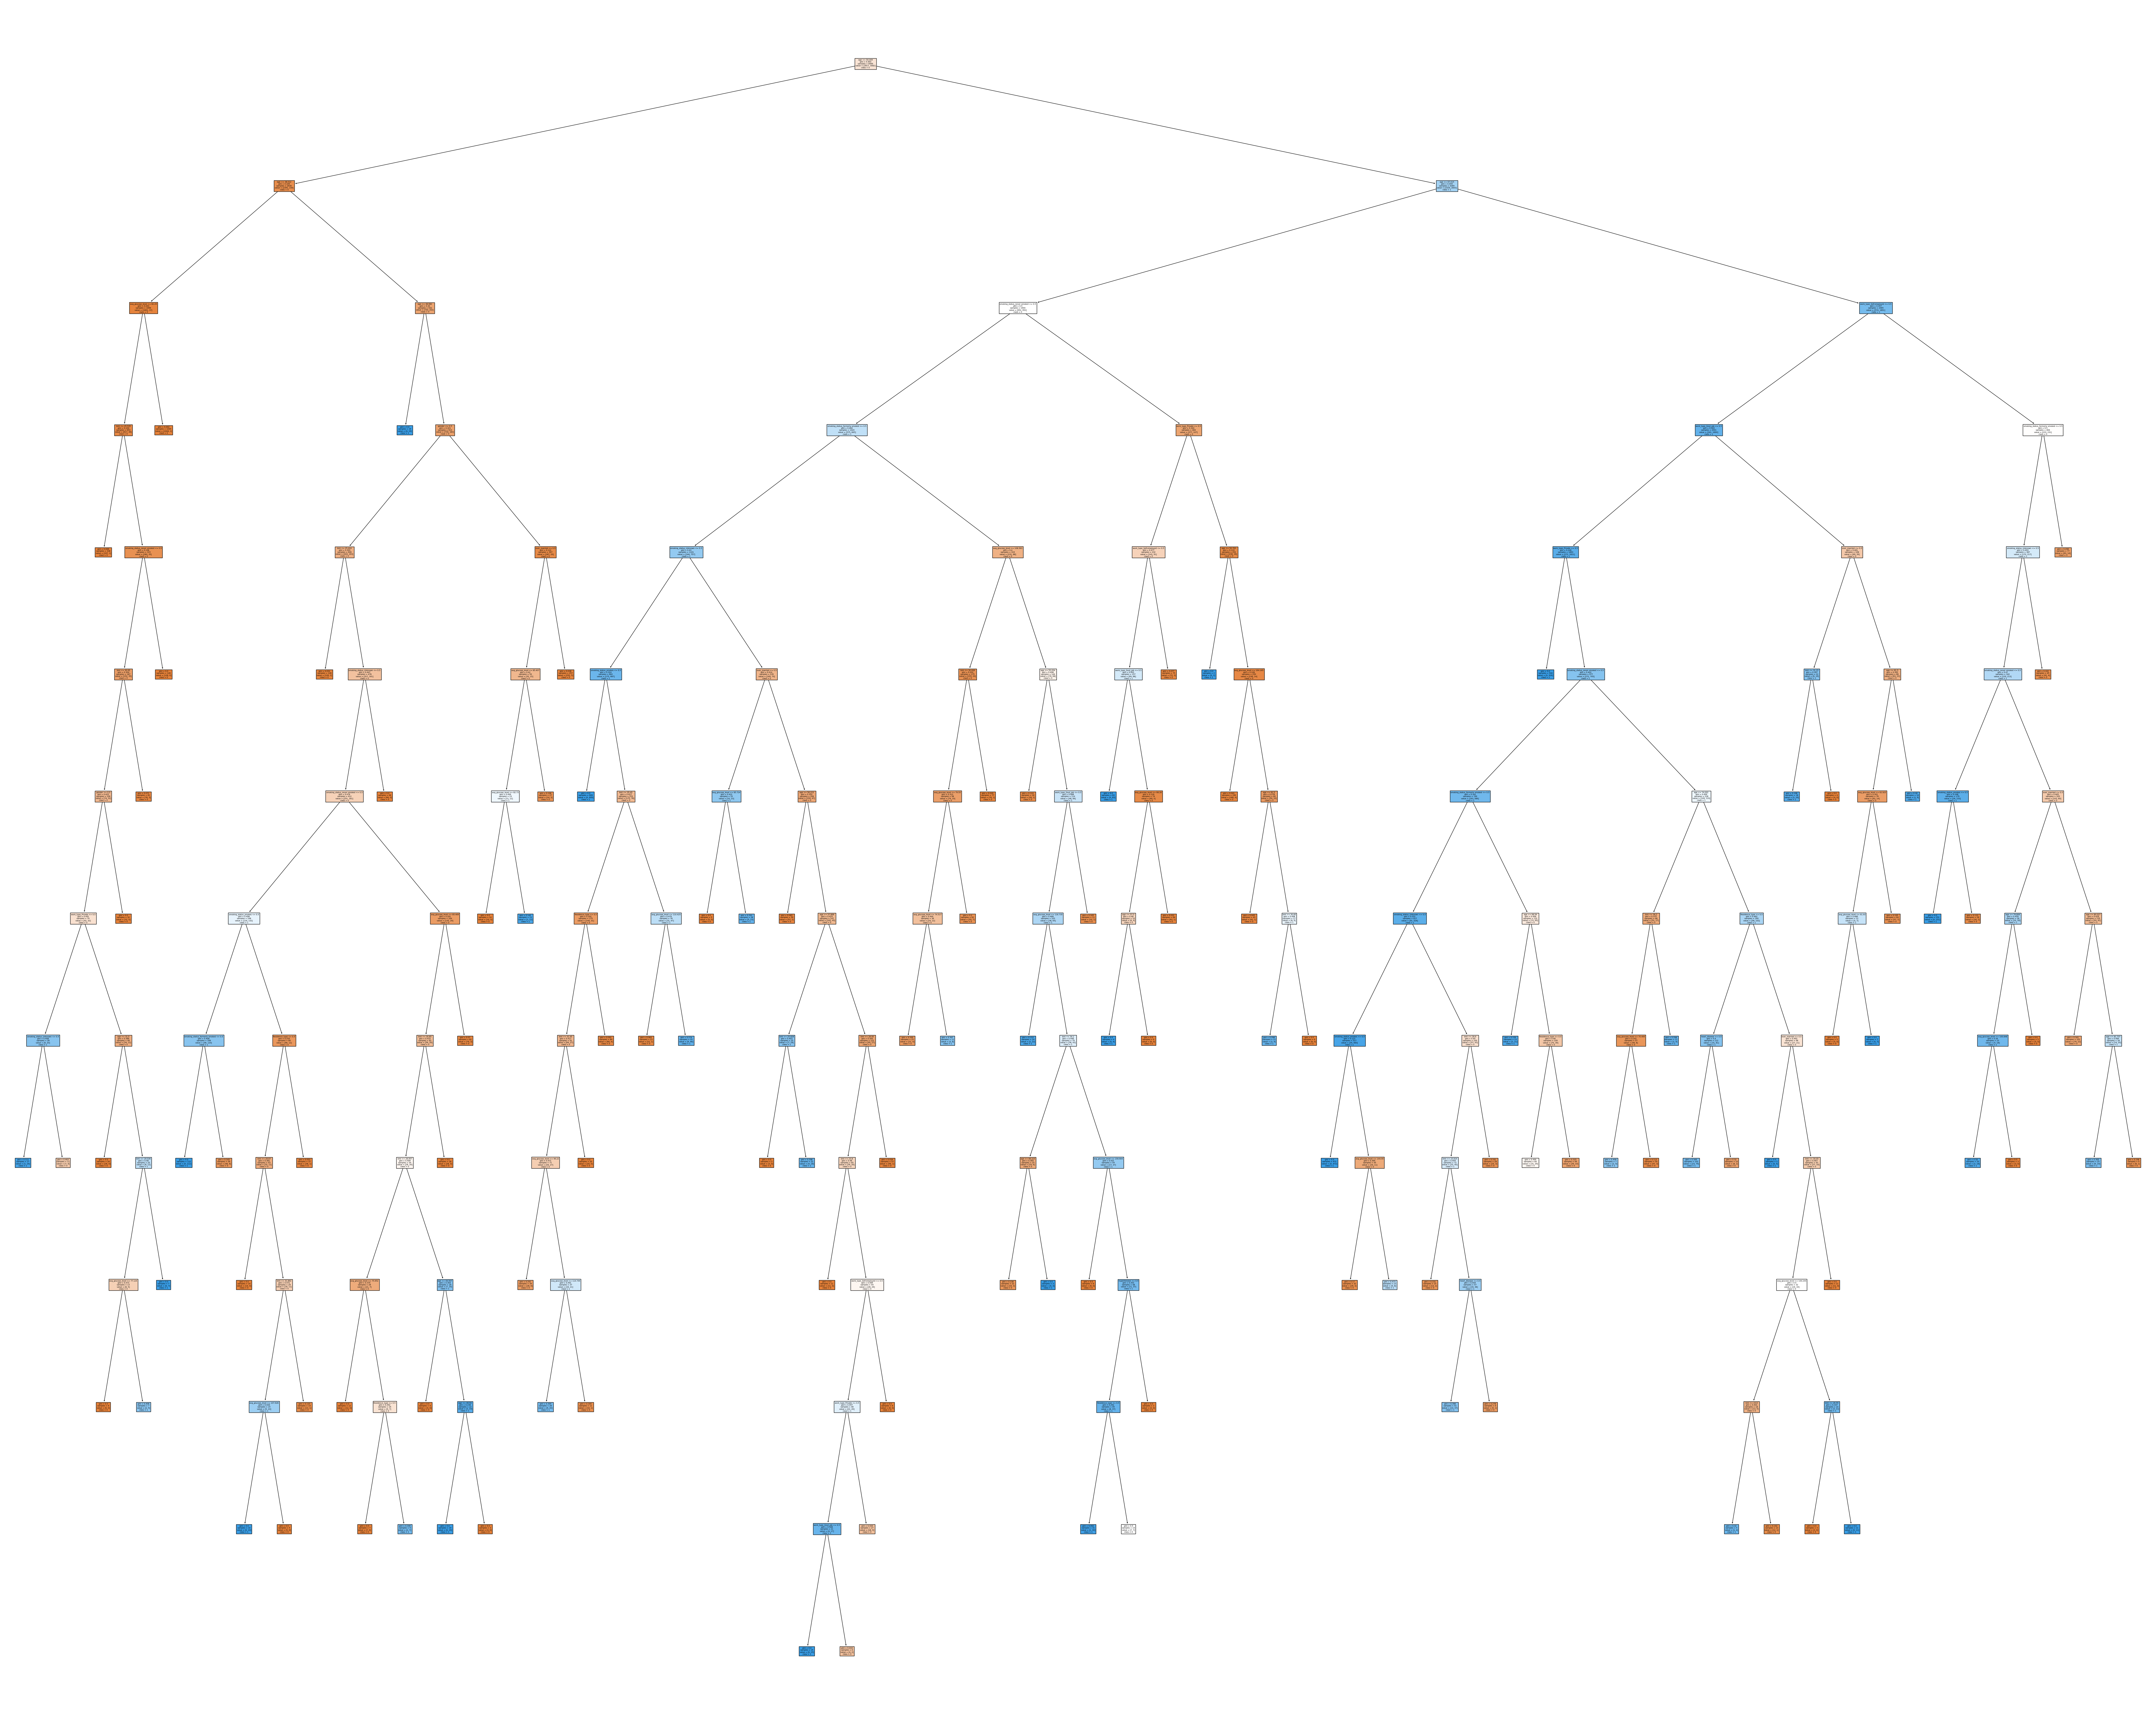

In [106]:
plt.figure(figsize=(100,80))
plot_tree(p_dt_clf, feature_names=x.columns, class_names=['0', '1'],filled=True)
plt.savefig('DecisionTreeHeart.png')

## single row testing

In [107]:
column_names = x.columns.tolist()
column_names

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [108]:
df1 = pd.read_csv(r"E:\Data set\healthcare-dataset-stroke-data.csv")
df1.drop('id',axis = 1,inplace = True)

In [109]:
df1[52:53]

gender   age  hypertension  heart_disease ever_married work_type   
52  Female  79.0             0              1          Yes   Private  \

   Residence_type  avg_glucose_level   bmi smoking_status  stroke  
52          Rural             127.29  27.7   never smoked       1

In [111]:
gender = 'Female'
age = 76.0
hypertension = 0
heart_disease = 1
ever_married = 'Yes'
work_type = 'Private'
Residence_type = 'Rural'
avg_glucose_level = 127.29
bmi = 27.7
smoking_status = 'never smoked'

gender = gender_data[gender]
ever_married = ever_married_data[ever_married]
Residence_type = Residence_type_data[Residence_type]

work_type = 'work_type_'+work_type
smoking_status = 'smoking_status_'+smoking_status

work_type_index = column_names.index(work_type)
smoking_status_index = column_names.index(smoking_status)


test_array = np.zeros([1,p_dt_clf.n_features_in_])
test_array[0,0] = gender
test_array[0,1] = age
test_array[0,2] = hypertension
test_array[0,3] = heart_disease
test_array[0,4] = ever_married
test_array[0,5] = Residence_type
test_array[0,6] = avg_glucose_level
test_array[0,7] = bmi
test_array[0,work_type_index] = 1
test_array[0,smoking_status_index] = 1

predicted_stroke = p_dt_clf.predict(test_array)[0]
predicted_stroke

0

In [112]:
with open('decision_tree_pruning.pkl','wb') as f:
    pickle.dump(p_dt_clf, f)

In [113]:
project_data = {'gender':gender_data,
               'ever_married':ever_married_data,
               'Residence_type':Residence_type_data,
               'column_names':column_names}

with open('proj_data.json','w') as f:
    json.dump(project_data, f)

In [114]:
df

gender   age  hypertension  heart_disease  ever_married  Residence_type   
0          1  67.0             0              1             1               1  \
1          0  61.0             0              0             1               0   
2          1  80.0             0              1             1               0   
3          0  49.0             0              0             1               1   
4          0  79.0             1              0             1               0   
...      ...   ...           ...            ...           ...             ...   
5105       0  80.0             1              0             1               1   
5106       0  81.0             0              0             1               1   
5107       0  35.0             0              0             1               0   
5108       1  51.0             0              0             1               0   
5109       0  44.0             0              0             1               1   

      avg_glucose_level   bmi  stroke  work_type_Govt_job   
0              169.3575  36.6       1                   0  \
1              169.3575  28.0       1                   0   
2              105.9200  32.5       1                   0   
3              169.3575  34.4       1                   0   
4              169.3575  24.0       1                   0   
...                 ...   ...     ...                 ...   
5105            83.7500  28.0       0                   0   
5106           125.2000  40.0       0                   0   
5107            82.9900  30.6       0                   0   
5108           166.2900  25.6       0                   0   
5109            85.2800  26.2       0                   1   

      work_type_Never_worked  work_type_Private  work_type_Self-employed   
0                          0                  1                        0  \
1                          0                  0                        1   
2                          0                  1                        0   
3                          0                  1                        0   
4                          0                  0                        1   
...                      ...                ...                      ...   
5105                       0                  1                        0   
5106                       0                  0                        1   
5107                       0                  0                        1   
5108                       0                  1                        0   
5109                       0                  0                        0   

      work_type_children  smoking_status_Unknown   
0                      0                       0  \
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
5105                   0                       0   
5106                   0                       0   
5107                   0                       0   
5108                   0                       0   
5109                   0                       1   

      smoking_status_formerly smoked  smoking_status_never smoked   
0                                  1                            0  \
1                                  0                            1   
2                                  0                            1   
3                                  0                            0   
4                                  0                            1   
...                              ...                          ...   
5105                               0                            1   
5106                               0                            1   
5107                               0                            1   
5108                               1                            0   
510